In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls /content/drive/
%cd "/content/drive/My Drive"
%cd "Colab Notebooks/nthudl/final_project"
!ls

MyDrive  Shareddrives
/content/drive/My Drive
/content/drive/My Drive/Colab Notebooks/nthudl/final_project
 0111LSTM_epochs_10_batch_128_Adam_lr_0.0001
 0111LSTM_epochs_25_batch_128_Adam_lr_0.0001
 01141to4_epochs_12_batch_64_Adam_lr_0.0001
'2022-01-10 13:57:32.766460'
'2022-01-10 13:58:07.222462'
'2022-01-10 13:58:18.747036'
'code_1st order regression.ipynb'
'code_1st to 4th order regression.ipynb'
'code_4th order regression.ipynb'
 cow_mlik.ipynb
 data
 EN
 final_project.ipynb
 final_project.rar
 LSTM
 lstm.ipynb
 LSTM.ipynb
 models.ipynb
 models_result
 models_results
'Namespace(batch_size=64, epochs=30, lr=0.0001, opt='\''Adam'\'', predict=False, resume='\''.'
 NN
 NN.ipynb
 preprocess.ipynb
 processed
 processed_eng
 result
 v1
 v2
 v3
 v4
 v5
 v6
 v7
 v8


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import argparse
import os

In [4]:
# x1 = pd.read_csv('data1/x_train.csv', header=0, low_memory=False)
# y1 = pd.read_csv('data1/y_train.csv', header=0, low_memory=False)
# x_test1 = pd.read_csv('data1/x_test.csv', header=0, low_memory=False)
# y_test1 = pd.read_csv('data1/y_test.csv', header=0, low_memory=False)
# print('x_train.shape= {}, y_train.shape= {}'.format(x1.shape, y1.shape))
# print('x_test.shape= {}, y_test.shape= {}'.format(x_test1.shape, y_test1.shape))

# x1.set_index('ID', inplace=True)
# y1.set_index('ID', inplace=True)
# x_test1.set_index('ID', inplace=True)
# y_test1.set_index('ID', inplace=True)

# print('x_train.shape= {}, y_train.shape= {}'.format(x1.shape, y1.shape))
# print('x_test.shape= {}, y_test.shape= {}'.format(x_test1.shape, y_test1.shape))

In [5]:
# argparse
parser = argparse.ArgumentParser(description='Final Project')
parser.add_argument('--n', default='1000', type=int, metavar='N',
                    help='number of trees')
parser.add_argument('--d', default='3', type=int,
                    metavar='N',
                    help='depth of trees')
parser.add_argument('--lr', '--learning-rate', default='0.1', type=float,
                    metavar='LR', help='initial learning rate', dest='lr')
parser.add_argument('--s', default='1', type=int, metavar='N',
                    help='seed')
parser.add_argument('--g', default='0.1', type=float, metavar='N',
                    help='gamma')

args = parser.parse_args(args=['--n', '2000', '--d', '5', '--lr', '0.1', '--s', '27', '--g', '0.1'])
DIR =  './models_result/'
if not os.path.exists(DIR):
    os.makedirs(DIR)

In [6]:
x2 = pd.read_csv('v3/x_train.csv', header=0, low_memory=False)
y2 = pd.read_csv('v3/y_train.csv', header=0, low_memory=False)
x_test2 = pd.read_csv('v3/x_test.csv', header=0, low_memory=False)
y_test2 = pd.read_csv('v3/y_test.csv', header=0, low_memory=False)
print('x_train.shape= {}, y_train.shape= {}'.format(x2.shape, y2.shape))
print('x_test.shape= {}, y_test.shape= {}'.format(x_test2.shape, y_test2.shape))

x2.set_index('ID', inplace=True)
y2.set_index('ID', inplace=True)
x_test2.set_index('ID', inplace=True)
y_test2.set_index('ID', inplace=True)

print('x_train.shape= {}, y_train.shape= {}'.format(x2.shape, y2.shape))
print('x_test.shape= {}, y_test.shape= {}'.format(x_test2.shape, y_test2.shape))

x_train.shape= (33254, 4013), y_train.shape= (33254, 2)
x_test.shape= (4263, 4013), y_test.shape= (4263, 2)
x_train.shape= (33254, 4012), y_train.shape= (33254, 1)
x_test.shape= (4263, 4012), y_test.shape= (4263, 1)


In [7]:
# x3 = pd.read_csv('v2/x_train.csv', header=0, low_memory=False)
# y3 = pd.read_csv('v2/y_train.csv', header=0, low_memory=False)
# x_test3 = pd.read_csv('v2/x_test.csv', header=0, low_memory=False)
# y_test3 = pd.read_csv('v2/y_test.csv', header=0, low_memory=False)
# print('x_train.shape= {}, y_train.shape= {}'.format(x3.shape, y3.shape))
# print('x_test.shape= {}, y_test.shape= {}'.format(x_test3.shape, y_test3.shape))

# x3.set_index('ID', inplace=True)
# y3.set_index('ID', inplace=True)
# x_test3.set_index('ID', inplace=True)
# y_test3.set_index('ID', inplace=True)

# print('x_train.shape= {}, y_train.shape= {}'.format(x3.shape, y3.shape))
# print('x_test.shape= {}, y_test.shape= {}'.format(x_test3.shape, y_test3.shape))

In [8]:
from sklearn.model_selection import train_test_split

# x_train1, x_val1, y_train1, y_val1 = train_test_split(x1, y1, test_size=.3, random_state=0)
x_train2, x_val2, y_train2, y_val2 = train_test_split(x2, y2, test_size=.3, random_state=0)
# x_train3, x_val3, y_train3, y_val3 = train_test_split(x3, y3, test_size=.3, random_state=0)

# RMSE (keras)

In [9]:
# from keras import backend as K
# def RMSE(y_pred, y_true):
#   return K.sqrt(K.mean(K.square(y_pred - y_true)))

#Linear Regression

In [10]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # Create linear regression object
# regr = LinearRegression()

In [11]:
# regr.fit(x_train, y_train)

In [12]:
# y_pred = regr.predict(x_val)

In [13]:
# linear_regression_score = regr.score(x_val, y_val)
# print(linear_regression_score)

In [14]:
# from math import sqrt
# # The coefficients
# print('Coefficients: \n', regr.coef_)
# # The mean squared error
# print("Root mean squared error: %.2f"
#    % sqrt(mean_squared_error(y_val, y_pred)))

In [15]:
# plt.scatter(y_val, y_pred)
# plt.xlabel('Measured')
# plt.ylabel('Predicted')
# plt.title('Linear Regression Predicted vs Actual')
# plt.show()

# test(先不要執行)

In [16]:
# pred1 = regr.predict(x_test)

In [17]:
# y_test['乳量'] = pred1
# y_test.reset_index(inplace=True)
# print(y_test.head(n=3))

# MLPRegressor

In [18]:
# from sklearn.neural_network import MLPRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # Create MLPRegressor object
# mlp = MLPRegressor()

In [19]:
# mlp.fit(x_train, y_train)

In [20]:
# # Score the model
# nn_regression_score = mlp.score(x_val, y_val)
# print(nn_regression_score)

In [21]:
# # Make predictions using the validation set
# nnr_pred = mlp.predict(x_val)
# # The mean squared error
# print("Root mean squared error: %.2f"
#       % sqrt(mean_squared_error(y_val, nnr_pred)))

In [22]:
# plt.scatter(y_val, nnr_pred)
# plt.xlabel('Measured')
# plt.ylabel('Predicted')
# plt.title('Neural Network Regression Predicted vs Actual')
# plt.show()

# Lasso

In [23]:
# from sklearn.linear_model import Lasso

# lasso = Lasso()

In [24]:
# lasso.fit(x_train, y_train)

In [25]:
# Score the model
# lasso_score = lasso.score(x_val, y_val)
# print(lasso_score)

In [26]:
# # Make predictions using the testing set
# lasso_pred = lasso.predict(x_val)
# # The mean squared error
# print("Root mean squared error: %.2f"
#       % sqrt(mean_squared_error(y_val, lasso_pred)))

In [27]:
# plt.scatter(y_val, lasso_pred)
# plt.xlabel('Measured')
# plt.ylabel('Predicted')
# plt.title('Lasso Predicted vs Actual')
# plt.show()

# Elastic Net

In [28]:
# from sklearn.linear_model import ElasticNet

# elasticnet = ElasticNet()

In [29]:
# elasticnet.fit(x_train, y_train)

In [30]:
# elasticnet_score = elasticnet.score(x_val, y_val)
# print(elasticnet_score)

In [31]:
# elasticnet_pred = elasticnet.predict(x_val)
# # The mean squared error
# print("Root mean squared error: %.2f"
#       % sqrt(mean_squared_error(y_val, elasticnet_pred)))

In [32]:
# plt.scatter(y_val, elasticnet_pred)
# plt.xlabel('Measured')
# plt.ylabel('Predicted')
# plt.title('Lasso Predicted vs Actual')
# plt.show()

# Random Forest Regressor

In [33]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# # Create Random Forrest Regressor object
# regr_rf = RandomForestRegressor(n_estimators=200, random_state=1234)

In [34]:
# Train the model using the training sets
# regr_rf.fit(x_train, y_train)

In [35]:
# Score the model
# decision_forest_score = regr_rf.score(x_val, y_val)
# print(decision_forest_score)

In [36]:
# Make predictions using the testing set
# regr_rf_pred = regr_rf.predict(x_val)
# # The mean squared error
# print("Root mean squared error: %.2f"
#       % sqrt(mean_squared_error(y_val, regr_rf_pred)))

In [37]:
# features = x.columns
# importances = regr_rf.feature_importances_
# indices = np.argsort(importances)

# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), features[indices])
# plt.xlabel('Relative Importance')
# plt.show()

In [38]:
# plt.scatter(y_val, regr_rf_pred)
# plt.xlabel('Measured')
# plt.ylabel('Predicted')
# plt.title('Decision Forest Predicted vs Actual')
# plt.show()

In [39]:
# y_test.set_index('ID', inplace=True)
# regr_rf_result = regr_rf.predict(x_test)
# y_test['乳量'] = regr_rf_result
# y_test.reset_index(inplace=True)
# print(y_test.head(n=3))
# output('models_results/regr_rf.csv', y_test)

# Extra Tree Regressor

In [40]:
# from sklearn.ensemble import ExtraTreesRegressor

# extra_tree = ExtraTreesRegressor(n_estimators=200, random_state=1234)

In [41]:
# extra_tree.fit(x_train, y_train)

In [42]:
# extratree_score = extra_tree.score(x_val, y_val)
# print(extratree_score)

In [43]:
# extratree_pred = extra_tree.predict(x_val)
# print("Root mean squared error: %.2f"
#       % sqrt(mean_squared_error(y_val, extratree_pred)))

In [44]:
# features = x.columns
# importances = extra_tree.feature_importances_
# indices = np.argsort(importances)

# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), features[indices])
# plt.xlabel('Relative Importance')
# plt.show()

In [45]:
# plt.scatter(y_val, extratree_pred)
# plt.xlabel('Measured')
# plt.ylabel('Predicted')
# plt.title('Extra Trees Predicted vs Actual')
# plt.show()

In [46]:
# y_test.set_index('ID', inplace=True)
# extratree_result = extra_tree.predict(x_test)
# y_test['乳量'] = extratree_result
# y_test.reset_index(inplace=True)
# print(y_test.head(n=3))
# output('models_results/extratree.csv', y_test)

# Decision Tree & Ada Tree

In [47]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # Create Decision Tree Regressor object
# tree_1 = DecisionTreeRegressor()

# tree_2 = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=200, learning_rate=.1)

In [48]:
# Train the model using the training sets
# tree_1.fit(x_train, y_train)
# tree_2.fit(x_train, y_train)

In [49]:
# Score the decision tree model
# decision_tree_score = tree_1.score(x_val, y_val)
# # Score the boosted decision tree model
# boosted_tree_score = tree_2.score(x_val, y_val)
# print(decision_tree_score)
# print(boosted_tree_score)

In [50]:
# Make predictions using the testing set
# tree_1_pred = tree_1.predict(x_val)
# tree_2_pred = tree_2.predict(x_val)
# # The mean squared error
# print("Root mean squared error: %.2f"
#       % sqrt(mean_squared_error(y_val, tree_2_pred)))

In [51]:
# features = x.columns
# importances = tree_2.feature_importances_
# indices = np.argsort(importances)

# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), features[indices])
# plt.xlabel('Relative Importance')
# plt.show()

In [52]:
# plt.scatter(y_val, tree_1_pred)
# plt.xlabel('Measured')
# plt.ylabel('Predicted')
# plt.title('Decision Tree Predicted vs Actual')
# plt.show()

In [53]:
# plt.scatter(y_val, tree_2_pred)
# plt.xlabel('Measured')
# plt.ylabel('Predicted')
# plt.title('Boosted Decision Tree Predicted vs Actual')
# plt.show()

In [54]:
# y_test.set_index('ID', inplace=True)
# tree_2_result = tree_2.predict(x_test)
# y_test['乳量'] = tree_2_result
# y_test.reset_index(inplace=True)
# print(y_test.head(n=3))
# output('models_results/tree_2.csv', y_test)

# XGBRegressor

In [55]:
from xgboost.sklearn import XGBRegressor

# #Fitting XGB regressor 
# xboost20 = XGBRegressor(booster='gbtree',
#             objective='reg:squarederror',
#             eval_metric='rmse',
#             gamma = 0.1,
#             min_child_weight= 3,
#             max_depth= 9,
#             subsample= 0.8,
#             colsample_bytree= 0.8,
#             tree_method= 'exact',
#             learning_rate=0.01,
#             n_estimators=20,
#             nthread=4,
#             scale_pos_weight=1,
#             seed=27)
# xboost20.fit(x_train, y_train)

In [56]:
# Fitting XGB regressor 
# xboost200 = XGBRegressor(booster='gbtree',
#             objective='reg:squarederror',
#             eval_metric='rmse',
#             gamma = 0.1,
#             min_child_weight= 3,
#             max_depth= 9,
#             subsample= 0.8,
#             colsample_bytree= 0.8,
#             tree_method= 'exact',
#             learning_rate=0.01,
#             n_estimators=200,
#             nthread=4,
#             scale_pos_weight=1,
#             seed=27)
# xboost200.fit(x_train, y_train)

In [57]:
# Fitting XGB regressor 
# data1
from xgboost.sklearn import XGBRegressor
# xboostv2 = XGBRegressor(booster='gbtree',
#             objective='reg:squarederror',
#             eval_metric='rmse',
#             gamma = 0.1,
#             min_child_weight= 3,
#             max_depth= 5,
#             subsample= 0.8,
#             colsample_bytree= 0.8,
#             tree_method= 'exact',
#             learning_rate=0.1,
#             n_estimators=2000,
#             nthread=4,
#             scale_pos_weight=1,
#             seed=27)
# xboostv2.fit(x_train1, y_train1)
# v3 
xboostv3 = XGBRegressor(booster='gbtree',
            objective='reg:squarederror',
            eval_metric='rmse',
            gamma = args.g,
            min_child_weight= 3,
            max_depth= args.d,
            subsample= 0.8,
            colsample_bytree= 0.8,
            tree_method= 'exact',
            learning_rate=args.lr,
            n_estimators=args.n,
            nthread=4,
            scale_pos_weight=1,
            seed=args.s)
xboostv3.fit(x_train2, y_train2)
# v4 
# xboostv4 = XGBRegressor(booster='gbtree',
#             objective='reg:squarederror',
#             eval_metric='rmse',
#             gamma = 0.1,
#             min_child_weight= 3,
#             max_depth= 5,
#             subsample= 0.8,
#             colsample_bytree= 0.8,
#             tree_method= 'exact',
#             learning_rate=0.1,
#             n_estimators=2000,
#             nthread=4,
#             scale_pos_weight=1,
#             seed=27)
# xboostv4.fit(x_train3, y_train3)

XGBRegressor(colsample_bytree=0.8, eval_metric='rmse', gamma=0.1, max_depth=5,
             min_child_weight=3, n_estimators=2000, nthread=4,
             objective='reg:squarederror', seed=27, subsample=0.8,
             tree_method='exact')

In [58]:
# # Fitting XGB regressor 
# from xgboost.sklearn import XGBRegressor
# xboost3 = XGBRegressor(booster='gbtree',
#             objective='reg:squarederror',
#             eval_metric='rmse',
#             gamma = 0.1,
#             min_child_weight= 3,
#             max_depth= 3,
#             subsample= 0.8,
#             colsample_bytree= 0.8,
#             tree_method= 'exact',
#             learning_rate=0.1,
#             n_estimators=2000,
#             nthread=4,
#             scale_pos_weight=1,
#             seed=27)
# xboost3.fit(x_train, y_train)

In [59]:
# Fitting XGB regressor 
# xboost5 = XGBRegressor(booster='gbtree',
#             objective='reg:squarederror',
#             eval_metric='rmse',
#             gamma = 0.1,
#             min_child_weight= 3,
#             max_depth= 5,
#             subsample= 0.8,
#             colsample_bytree= 0.8,
#             tree_method= 'exact',
#             learning_rate=0.1,
#             n_estimators=2000,
#             nthread=4,
#             scale_pos_weight=1,
#             seed=27)
# xboost5.fit(x_train, y_train)

In [60]:
# Fitting XGB regressor 
# xboost9 = XGBRegressor(booster='gbtree',
#             objective='reg:squarederror',
#             eval_metric='rmse',
#             gamma = 0.1,
#             min_child_weight= 3,
#             max_depth= 9,
#             subsample= 0.8,
#             colsample_bytree= 0.8,
#             tree_method= 'exact',
#             learning_rate=0.1,
#             n_estimators=2000,
#             nthread=4,
#             scale_pos_weight=1,
#             seed=27)
# xboost9.fit(x_train, y_train)

In [61]:
# Fitting XGB regressor 
# from xgboost.sklearn import XGBRegressor
# xboost01 = XGBRegressor(booster='gbtree',
#             objective='reg:squarederror',
#             eval_metric='rmse',
#             gamma = 0.1,
#             min_child_weight= 3,
#             max_depth= 9,
#             subsample= 0.8,
#             colsample_bytree= 0.8,
#             tree_method= 'exact',
#             learning_rate=0.1,
#             n_estimators=2000,
#             nthread=4,
#             scale_pos_weight=1,
#             seed=27)
# xboost01.fit(x_train, y_train)

In [62]:
# Fitting XGB regressor 
# xboost001 = XGBRegressor(booster='gbtree',
#             objective='reg:squarederror',
#             eval_metric='rmse',
#             gamma = 0.1,
#             min_child_weight= 3,
#             max_depth= 9,
#             subsample= 0.8,
#             colsample_bytree= 0.8,
#             tree_method= 'exact',
#             learning_rate=0.01,
#             n_estimators=2000,
#             nthread=4,
#             scale_pos_weight=1,
#             seed=27)
# xboost001.fit(x_train, y_train)

In [63]:
# Fitting XGB regressor 
# xboost0001 = XGBRegressor(booster='gbtree',
#             objective='reg:squarederror',
#             eval_metric='rmse',
#             gamma = 0.1,
#             min_child_weight= 3,
#             max_depth= 9,
#             subsample= 0.8,
#             colsample_bytree= 0.8,
#             tree_method= 'exact',
#             learning_rate=0.001,
#             n_estimators=2000,
#             nthread=4,
#             scale_pos_weight=1,
#             seed=27)
# xboost0001.fit(x_train, y_train)

In [64]:
# xgb_score20 = xboost20.score(x_val, y_val)
# print(xgb_score20)
# xgb_score200 = xboost200.score(x_val, y_val)
# print(xgb_score200)
# xgb_score2000 = xboost2000.score(x_val, y_val)
# print(xgb_score2000)
# xgb_scorev2 = xboostv2.score(x_val1, y_val1)
# print(xgb_scorev2)
xgb_scorev3 = xboostv3.score(x_val2, y_val2)
print(xgb_scorev3)
# xgb_scorev4 = xboostv4.score(x_val3, y_val3)
# print(xgb_scorev4)


0.7021444908081313


In [65]:
#Predict 20 200 2000
# xboost_pred20 = xboost20.predict(x_val)
# xboost_pred200 = xboost200.predict(x_val)
# xboost_pred2000 = xboost2000.predict(x_val)
# print("Root mean squared error: %.2f"
#       % sqrt(mean_squared_error(y_val, xboost_pred20)))
# print("Root mean squared error: %.2f"
#       % sqrt(mean_squared_error(y_val, xboost_pred200)))
# print("Root mean squared error: %.2f"
#       % sqrt(mean_squared_error(y_val, xboost_pred2000)))
# xboost_predv2 = xboostv2.predict(x_val1)
# print("Root mean squared error: %.2f"
#       % sqrt(mean_squared_error(y_val1, xboost_predv2)))
xboost_predv3 = xboostv3.predict(x_val2)
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_val2, xboost_predv3)))
# xboost_predv4 = xboostv4.predict(x_val3)
# print("Root mean squared error: %.2f"
#       % sqrt(mean_squared_error(y_val3, xboost_predv4)))

Root mean squared error: 4.75


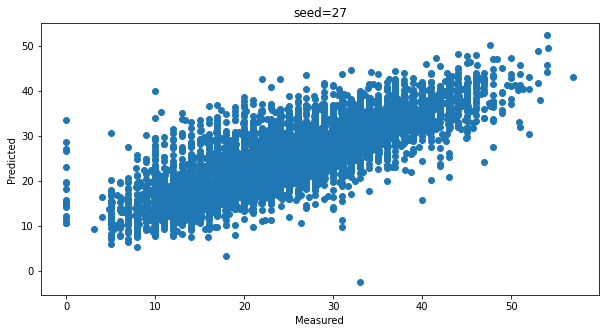

In [66]:
fig = plt.figure(figsize=(10,5))
# plt.subplot(1,3,1)
# plt.scatter(y_val, xboost_pred20)
# plt.xlabel('Measured')
# plt.ylabel('Predicted')
# plt.title('Tree Nums = 20')
# plt.subplot(1,3,2)
# plt.scatter(y_val, xboost_pred200)
# plt.xlabel('Measured')
# plt.ylabel('Predicted')
# plt.title('Tree Nums = 200')
# plt.subplot(1,3,3)
# plt.scatter(y_val, xboost_pred2000)
# plt.xlabel('Measured')
# plt.ylabel('Predicted')
# plt.title('Tree Nums = 2000')
# plt.show()
# plt.subplot(1,3,1)
# plt.scatter(y_val1, xboost_predv2)
# plt.xlabel('Measured')
# plt.ylabel('Predicted')
# plt.title('V2')
# plt.subplot(1,2,1)
plt.scatter(y_val2, xboost_predv3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('seed='+str(args.s))
fig.savefig(DIR+'xgb'+str(args.n)+'_'+str(args.d)+'_'+str(args.lr)+'_'+str(args.s)+'_'+str(args.g)+'.png',format='png')
# plt.subplot(1,2,2)
# plt.scatter(y_val3, xboost_predv4)
# plt.xlabel('Measured')
# plt.ylabel('Predicted')
# plt.title('V2')
# plt.show()

In [67]:
# xgb_score3 = xboost3.score(x_val, y_val)
# print(xgb_score3)
# xgb_score5 = xboost5.score(x_val, y_val)
# print(xgb_score5)
# xgb_score9 = xboost9.score(x_val, y_val)
# print(xgb_score9)

In [68]:
#Predict 3 5 9
# xboost_pred3 = xboost3.predict(x_val)
# xboost_pred5 = xboost5.predict(x_val)
# xboost_pred9 = xboost9.predict(x_val)
# print("Root mean squared error: %.2f"
#       % sqrt(mean_squared_error(y_val, xboost_pred3)))
# print("Root mean squared error: %.2f"
#       % sqrt(mean_squared_error(y_val, xboost_pred5)))
# print("Root mean squared error: %.2f"
#       % sqrt(mean_squared_error(y_val, xboost_pred9)))

In [69]:
# fi = plt.figure(figsize=(20,5))
# plt.subplot(1,3,1)
# plt.scatter(y_val, xboost_pred3)
# plt.xlabel('Measured')
# plt.ylabel('Predicted')
# plt.title('Tree Depth = 3')
# plt.subplot(1,3,2)
# plt.scatter(y_val, xboost_pred5)
# plt.xlabel('Measured')
# plt.ylabel('Predicted')
# plt.title('Tree Depth = 5')
# plt.subplot(1,3,3)
# plt.scatter(y_val, xboost_pred9)
# plt.xlabel('Measured')
# plt.ylabel('Predicted')
# plt.title('Tree Depth = 9')
# plt.show()

In [70]:
# xgb_score01 = xboost01.score(x_val, y_val)
# print(xgb_score01)
# xgb_score001 = xboost001.score(x_val, y_val)
# print(xgb_score001)
# xgb_score0001 = xboost0001.score(x_val, y_val)
# print(xgb_score0001)

In [71]:
#Predict 01 001 0001
# xboost_pred01 = xboost01.predict(x_val)
# xboost_pred001 = xboost001.predict(x_val)
# xboost_pred0001 = xboost0001.predict(x_val)
# print("Root mean squared error: %.2f"
#       % sqrt(mean_squared_error(y_val, xboost_pred01)))
# print("Root mean squared error: %.2f"
#       % sqrt(mean_squared_error(y_val, xboost_pred001)))
# print("Root mean squared error: %.2f"
#       % sqrt(mean_squared_error(y_val, xboost_pred0001)))

In [72]:
# f = plt.figure(figsize=(20,5))
# plt.subplot(1,3,1)
# plt.scatter(y_val, xboost_pred01)
# plt.xlabel('Measured')
# plt.ylabel('Predicted')
# plt.title('Learning rate = 0.1')
# plt.subplot(1,3,2)
# plt.scatter(y_val, xboost_pred001)
# plt.xlabel('Measured')
# plt.ylabel('Predicted')
# plt.title('Learning rate = 0.01')
# plt.subplot(1,3,3)
# plt.scatter(y_val, xboost_pred0001)
# plt.xlabel('Measured')
# plt.ylabel('Predicted')
# plt.title('Learning rate = 0.001')
# plt.show()

In [73]:
# import xgboost as xgb
# fig, ax = plt.subplots(1, 1, figsize=(20, 13))
# xgb.plot_importance(xboost2000, max_num_features=50, height=0.5, ax=ax)

In [74]:
def output(filepath, data):
    df_SAMPLE = pd.DataFrame.from_dict(data)
    df_SAMPLE.to_csv(filepath, index=False)
    print('Success output to ' + filepath)

In [75]:
# y_test = pd.read_csv('v4/y_test.csv', header=0, low_memory=False)
# y_test.set_index('ID', inplace=True)
# xboost_result20 = xboost20.predict(x_test)
# y_test['乳量'] = xboost_result20
# y_test.reset_index(inplace=True)
# print(y_test.head(n=3))
# output('models_results/xgbv4_20.csv', y_test)

# y_test = pd.read_csv('v4/y_test.csv', header=0, low_memory=False)
# y_test.set_index('ID', inplace=True)
# xboost_result200 = xboost200.predict(x_test)
# y_test['乳量'] = xboost_result200
# y_test.reset_index(inplace=True)
# print(y_test.head(n=3))
# output('models_results/xgbv4_200.csv', y_test)

# y_test = pd.read_csv('v3/y_test.csv', header=0, low_memory=False)
# y_test.set_index('ID', inplace=True)
# xboost_result2000 = xboost2000.predict(x_test)
# y_test['乳量'] = xboost_result2000
# y_test.reset_index(inplace=True)
# print(y_test.head(n=3))
# output('models_results/xgbv3_2000.csv', y_test)

# y_test = pd.read_csv('v3/y_test.csv', header=0, low_memory=False)
# y_test.set_index('ID', inplace=True)
# xboost_resultv2 = xboostv2.predict(x_test1)
# y_test1['乳量'] = xboost_resultv2
# y_test1.reset_index(inplace=True)
# print(y_test1.head(n=3))
# output('models_results/xgbv2.csv', y_test1)

y_test2 = pd.read_csv('v3/y_test.csv', header=0, low_memory=False)
y_test2.set_index('ID', inplace=True)
xboost_resultv3 = xboostv3.predict(x_test2)
y_test2['乳量'] = xboost_resultv3
y_test2=y_test2.sort_values(by=['ID'])
y_test2.reset_index(inplace=True)
print(y_test2.head(n=3))
output(DIR+'xgb'+str(args.n)+'_'+str(args.d)+'_'+str(args.lr)+'_'+str(args.s)+'_'+str(args.g)+'.csv', y_test2)

# y_test3 = pd.read_csv('v8/y_test.csv', header=0, low_memory=False)
# y_test3.set_index('ID', inplace=True)
# xboost_resultv4 = xboostv4.predict(x_test3)
# y_test3['乳量'] = xboost_resultv4
# y_test3=y_test3.sort_values(by=['ID'])
# y_test3.reset_index(inplace=True)
# print(y_test3.head(n=3))
# output('models_results/xgbv2.csv', y_test3)

    ID         乳量
0  480  18.752218
1  742  34.186546
2  743  35.433525
Success output to ./models_result/xgb2000_5_0.1_27_0.1.csv


In [76]:
# y_test = pd.read_csv('data1/y_test.csv', header=0, low_memory=False)
# y_test.set_index('ID', inplace=True)
# xboost_result3 = xboost3.predict(x_test)
# y_test['乳量'] = xboost_result3
# y_test.reset_index(inplace=True)
# print(y_test.head(n=3))
# output('models_results/xgboost_3.csv', y_test)

# y_test = pd.read_csv('data1/y_test.csv', header=0, low_memory=False)
# y_test.set_index('ID', inplace=True)
# xboost_result5 = xboost5.predict(x_test)
# y_test['乳量'] = xboost_result5
# y_test.reset_index(inplace=True)
# print(y_test.head(n=3))
# output('models_results/xgboost_5.csv', y_test)

# y_test = pd.read_csv('data1/y_test.csv', header=0, low_memory=False)
# y_test.set_index('ID', inplace=True)
# xboost_result9 = xboost9.predict(x_test)
# y_test['乳量'] = xboost_result9
# y_test.reset_index(inplace=True)
# print(y_test.head(n=3))
# output('models_results/xgboost_9.csv', y_test)



In [77]:
# y_test = pd.read_csv('data1/y_test.csv', header=0, low_memory=False)
# y_test.set_index('ID', inplace=True)
# xboost_result01 = xboost01.predict(x_test)
# y_test['乳量'] = xboost_result01
# y_test.reset_index(inplace=True)
# print(y_test.head(n=3))
# output('models_results/xgboost_01.csv', y_test)

# y_test = pd.read_csv('data1/y_test.csv', header=0, low_memory=False)
# y_test.set_index('ID', inplace=True)
# xboost_result001 = xboost001.predict(x_test)
# y_test['乳量'] = xboost_result001
# y_test.reset_index(inplace=True)
# print(y_test.head(n=3))
# output('models_results/xgboost_001.csv', y_test)

# y_test = pd.read_csv('data1/y_test.csv', header=0, low_memory=False)
# y_test.set_index('ID', inplace=True)
# xboost_result0001 = xboost0001.predict(x_test)
# y_test['乳量'] = xboost_result0001
# y_test.reset_index(inplace=True)
# print(y_test.head(n=3))
# output('models_results/xgboost_0001.csv', y_test)